<h3>Building model for raisin type prediction</h3>

In this example I use a [Dataset from Kaggle](https://www.kaggle.com/datasets/muratkokludataset/raisin-dataset). I use logistic regression model to predict one of two raisin types.

- Features (X) used in the dataset are different morphological features that were extracted based on image processing:    
    - Area: Gives the number of pixels within the boundaries of the raisin grain.
    - Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin grain and the pixels around it.
    - MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin grain.
    - MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin grain.
    - Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
    - ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin grain.
    - Extent: Gives the ratio of the region formed by the raisin grain to the total pixels in the bounding box.

[Full text of the article](https://dergipark.org.tr/tr/download/article-file/1227592) where the dataset is described.

In [1]:
#import pandas and have a look at the dataset
import pandas as pd

raisin = pd.read_excel('Raisin_Dataset.xlsx')
print(raisin.shape)
raisin.head(5)

(900, 8)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [2]:
#there are no null values and all the columns have correct data type
raisin.info()
raisin.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [3]:
#running descriptive statistics on all the variables
round(raisin.describe(),2)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.00,900.00,900.00,900.00,900.00,900.00,900.00
mean,87804.13,430.93,254.49,0.78,91186.09,0.70,1165.91
std,39002.11,116.04,49.99,0.09,40769.29,0.05,273.76
min,25387.00,225.63,143.71,0.35,26139.00,0.38,619.07
25%,59348.00,345.44,219.11,0.74,61513.25,0.67,966.41
50%,78902.00,407.80,247.85,0.80,81651.00,0.71,1119.51
75%,105028.25,494.19,279.89,0.84,108375.75,0.73,1308.39
max,235047.00,997.29,492.28,0.96,278217.00,0.84,2697.75


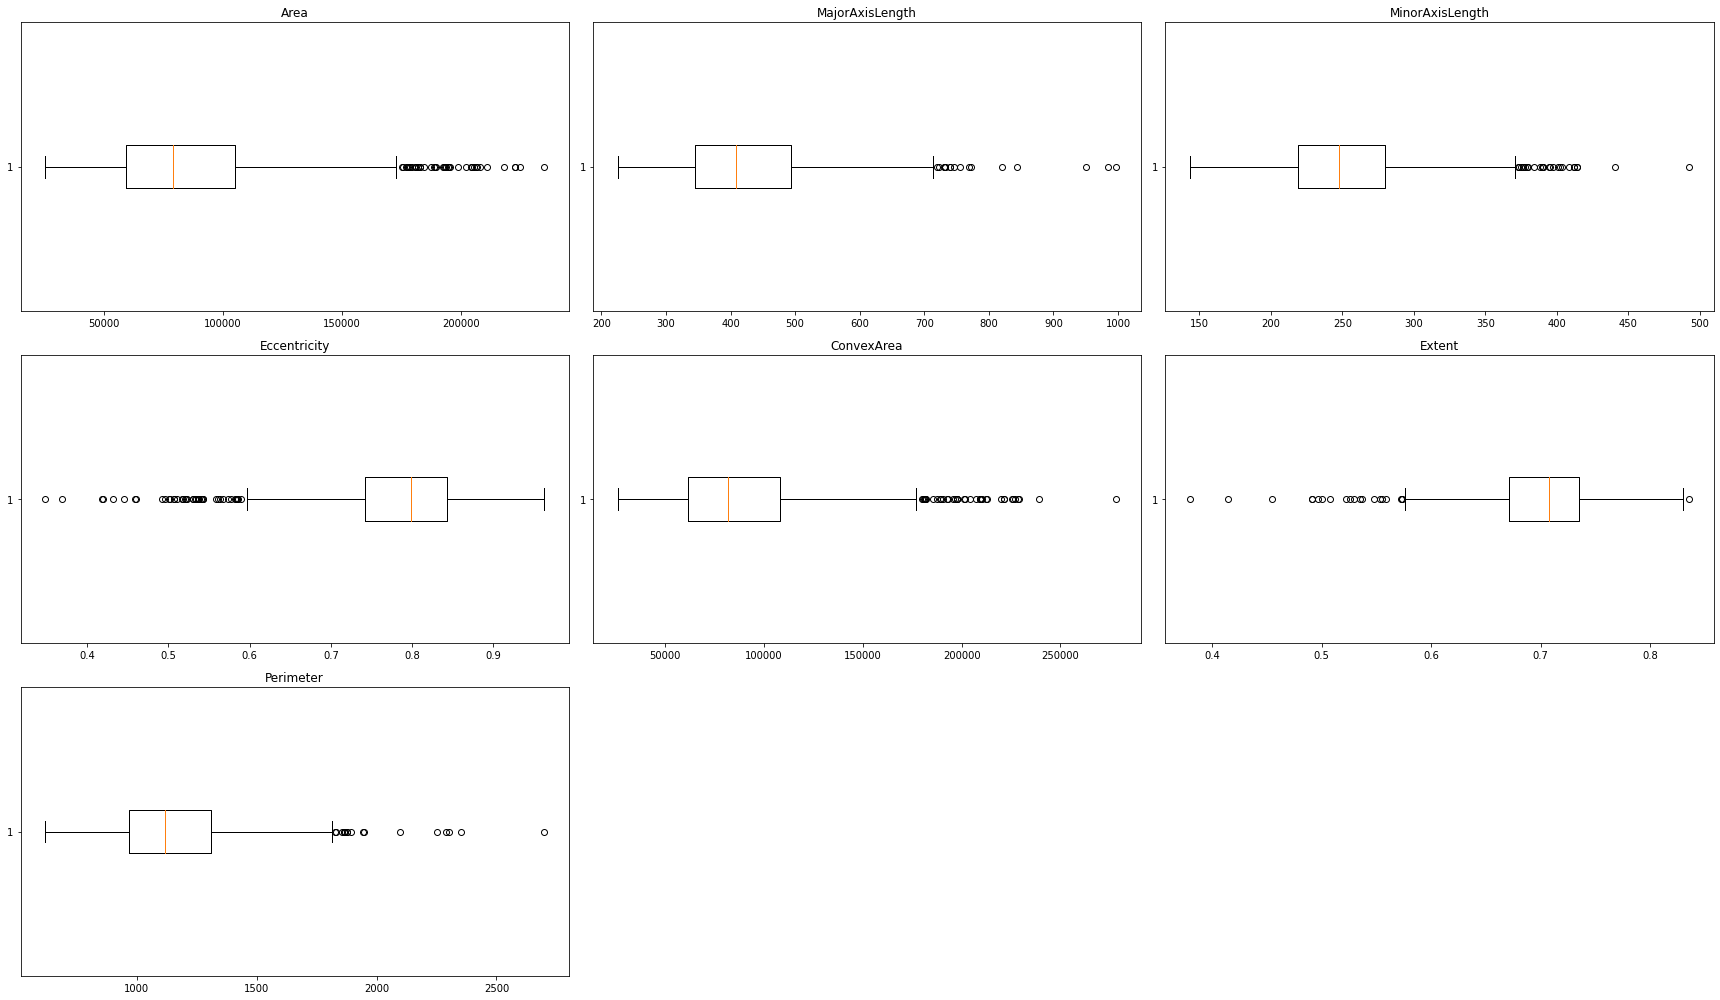

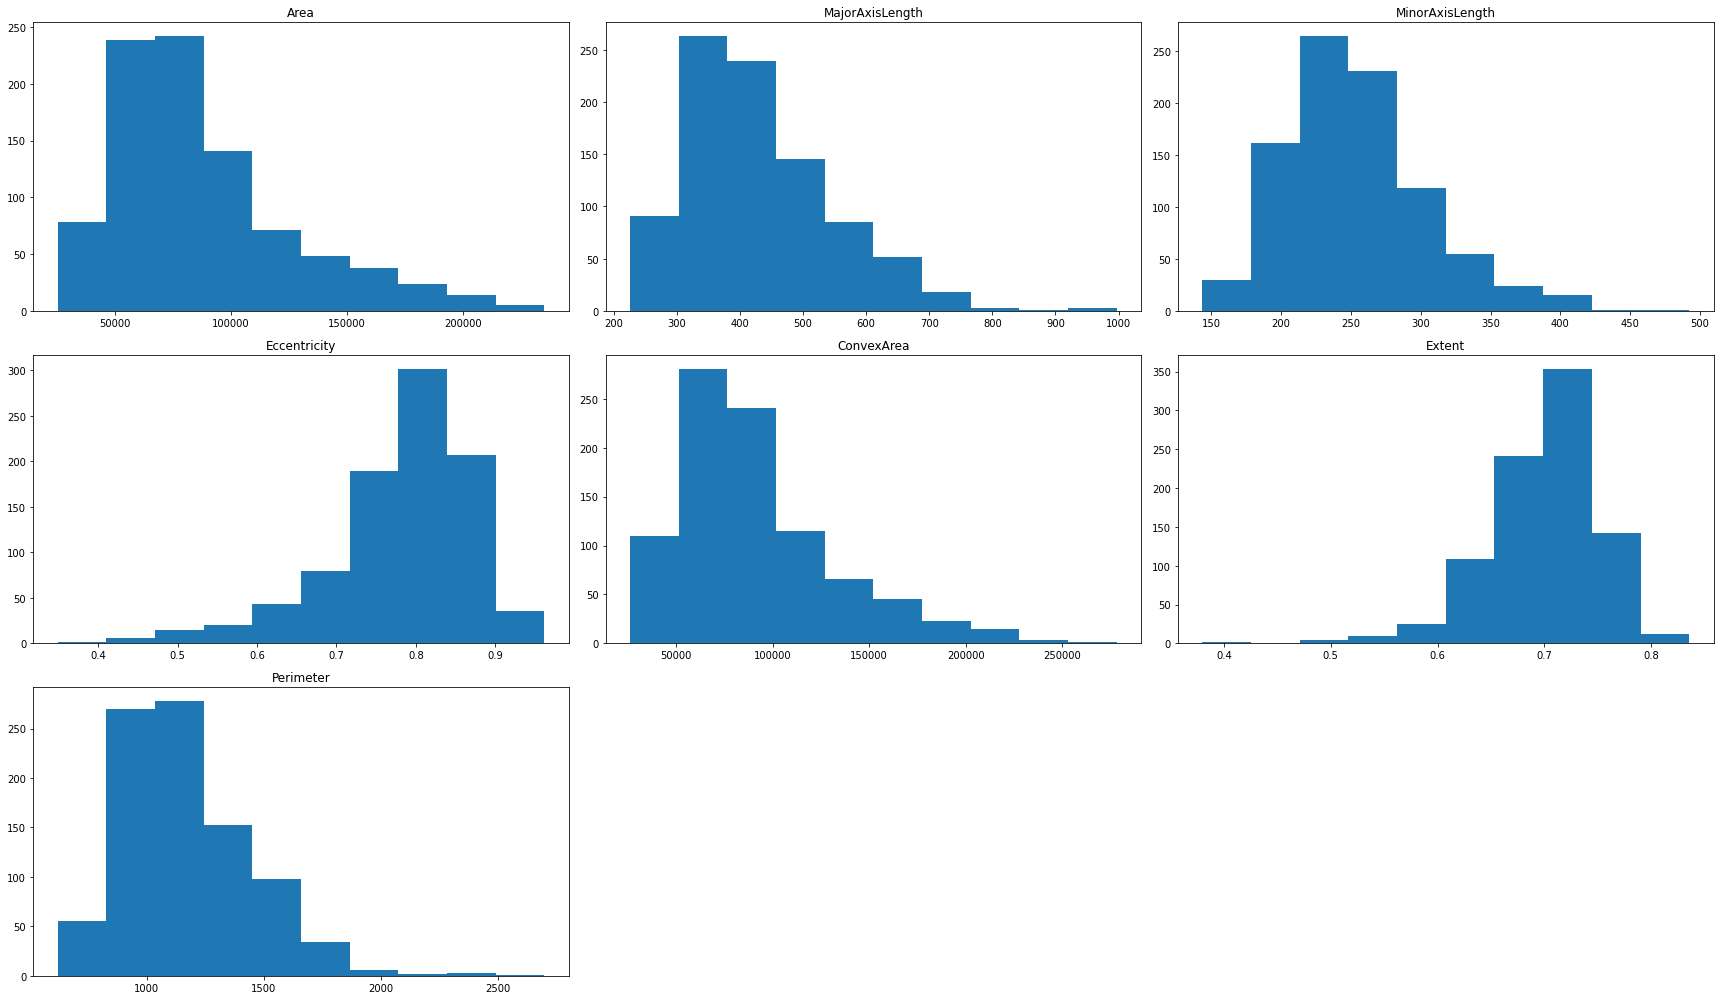

In [4]:
#let's look at outliers and distribution of the  features.
#All the features have outliers and skewed distribution, close to normal.
import matplotlib.pyplot as plt 
fig, axs = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(24, 14)
cols_df = [raisin[i] for i in raisin.columns[:-1]]

for i, ax, title in zip(cols_df,axs.reshape(-1), raisin.columns[:-1]):
    bp = ax.boxplot(i, vert = 0)
    ax.title.set_text(title)
fig.delaxes(axs[2,2])
fig.delaxes(axs[2,1])
fig.tight_layout()
plt.show()

fig, axs = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(24, 14)
for i, ax, title in zip(cols_df,axs.reshape(-1), raisin.columns[:-1]):
    bp = ax.hist(i)
    ax.title.set_text(title)
fig.delaxes(axs[2,2])
fig.delaxes(axs[2,1])
fig.tight_layout()
plt.show()

In [5]:
#let's look how many examples each class contains. We can see that ratio is equal, so, the sample is balanced.
raisin.Class.value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

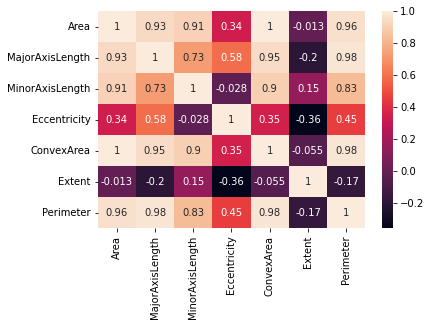

In [6]:
#plotting correlation heatmap, we can see high correlations between several metrics, which is quite predictable.
import seaborn as sns
sns.heatmap(raisin.corr(), annot=True);

In [7]:
#import libraries for model building
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

In [8]:
#It's neede to convert Class column to numerical values.
#Since there's only two classes - binnary classification problem, we can use 0 and 1.
raisin.Class = pd.factorize(raisin.Class)[0]

In [9]:
#Divide dataset into X and Y features, after that split into training and test set.
Y = raisin.Class
X = raisin.drop('Class', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

In [10]:
#Before trainig, it's needed to normalize the examples to decrease the variation.
#For this purpose we can use standart scaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
#Using Logistic Regression Algorithm to the Training Set with random initialization
log = LogisticRegression(random_state = 0)
model = log.fit(X_train, Y_train)
  
#print model accuracy on the training data.
print('Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
 

Logistic Regression Training Accuracy: 0.8629629629629629


In [12]:
#we can create a confusion matrix and estimate the results for the test set
cm = confusion_matrix(Y_test, model.predict(X_test)) 
#extracting TN, FP, FN, TP
TN, FP, FN, TP = confusion_matrix(Y_test, model.predict(X_test)).ravel()
print(cm)
print('Model Testing Accuracy = "{}"'.format((TP + TN) / (TP + TN + FN + FP)))

[[36  4]
 [ 5 45]]
Model Testing Accuracy = "0.9"


In [13]:
#I use pickle to save the model and trained standart scaller
import pickle
pickle.dump(model, open('model_raisin.pkl','wb'))
pickle.dump(sc, open('standart_scale.pkl','wb'))

In [14]:
#Finally, I would like to test the model on a single example from the dataset
#load the model and standart scaler
model = pickle.load(open('model_raisin.pkl','rb'))
sc= pickle.load(open('standart_scale.pkl','rb'))

#create list of raisin types
CATEGORIES = ['Kecimen', 'Besni']
input = [53698,	348.223231,	197.752897,	0.823104,	56089,	0.731341,	938.705]

#normalize data and display prediction
input = sc.transform([input])
print(CATEGORIES[int(model.predict(input))])


Kecimen


References:
1. Raisin Dataset by Murat Koklu, Kaggle - https://www.kaggle.com/datasets/muratkokludataset/raisin-dataset/metadata.

2. Wine classification Colab Notebook: https://colab.research.google.com/drive/1_64Ab7wNsVxvru-EbT8boiOOw1ltn7jk?usp=sharing#scrollTo=TGnyZyiAKmPC.